# Uncertainties on the number of backgrounds

## Objectives

 * Estimate the uncertainties in the number of background events

## Physics

We estimate the parameters uncertainty using the log likelihood scan.

We have estimated the parameters as the values where the -2 log likelihood has a minimum

We estimate the uncertenties at 60% confidence level using the value where the -2 log likelihood increses by one unit respect the minimum.

$$
\Delta - 2 \log \mathcal{L}( {\bf E} | {\bf n}) = 1
$$

To be precise, to compute the uncertainty on $n^{Bi}_b$ we scan the likelihood along the $n^{Bi}_b$, but we estimate the other parameter $\hat{n}^{Tl}_b(n^{Bi}_b)$ as the value that minimizes the -2 log likelihood, $-2 \log \mathcal{L}({\bf E} | {\bf n})$ for a fix $n^{Bi}_b$.

## Analysis

In [16]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Importing modules

In [17]:
import numpy  as np
import tables as tb
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats     as stats  # statistics and Many PDFs 
#import scipy.optimize  as optimize # Minimice funtions

import warnings
warnings.filterwarnings('ignore')

In [18]:
# REMEMBER TO ADD Your Fanal FOLDER TO PYTHONPATH
import os
import sys
rootpath = os.getcwd()[:-15]
print('add path to PYTHONPATH : ', rootpath)
sys.path.insert(0, os.path.abspath(rootpath))

add path to PYTHONPATH :  /Users/hernando/work/docencia/master/Fisica_Particulas/USC-Fanal-v2/


In [19]:
import core.pltext  as pltext   # extensions for plotting histograms
import core.hfit    as hfit     # extension to fit histograms
import core.efit    as efit     # Fit Utilites - Includes Extend Likelihood Fit with composite PDFs
import core.utils   as ut       # generic utilities
import ana.fanal    as fn       # analysis functions specific to fanal
import ana.pltfanal as pltfn    # plotting fanal functions
import     collpars as collpars # collaboration specific parameters
pltext.style()

### Parameters

In [20]:
collaboration = collpars.collaboration
sel_erange    = collpars.sel_erange
sel_eroi      = collpars.sel_eroi

eff_Bi_blind  = collpars.eff_Bi_blind
eff_Tl_blind  = collpars.eff_Tl_blind

eff_Bi_E      = collpars.eff_Bi_E
eff_Tl_E      = collpars.eff_Tl_E
eff_Bi_RoI    = collpars.eff_Bi_RoI
eff_Tl_RoI    = collpars.eff_Tl_RoI

print('Collaboration         : {:s}'.format(collaboration))
print('Energy range          : ({:6.3f}, {:6.3f}) MeV'.format(*sel_erange))
print('RoI    range          : ({:6.3f}, {:6.3f}) MeV'.format(*sel_eroi))
print('Bi eff in E range     : {:6.4f} %'.format(100.*eff_Bi_E))
print('Tl eff in E range     : {:6.4f} %'.format(100.*eff_Tl_E))
print('Bi eff in RoI         : {:6.4f} %'.format(100.*eff_Bi_RoI))
print('Tl eff in RoI         : {:6.4f} %'.format(100.*eff_Tl_RoI))

Collaboration         : new_beta
Energy range          : ( 2.400,  2.700) MeV
RoI    range          : ( 2.430,  2.480) MeV
Bi eff in E range     : 1.8000 %
Tl eff in E range     : 0.7300 %
Bi eff in RoI         : 1.5500 %
Tl eff in RoI         : 0.0194 %


In [21]:
# number of  blind events
n_Bi_blind = eff_Bi_blind * collpars.n_Bi_total
n_Tl_blind = eff_Tl_blind * collpars.n_Tl_total
n_blind    = [n_Bi_blind, n_Tl_blind]
print('Number of bkg events in blind data : Bi = {:6.2f}, Tl = {:6.2f}.'.format(*n_blind))

Number of bkg events in blind data : Bi = 1102.30, Tl = 14606.46.


## Access the data

In [22]:
filename = '/data/fanal_' + collaboration + '.h5'
print('Data path and filename : ', rootpath + filename)

mcbi       = pd.read_hdf(rootpath + filename, key = 'mc/bi214')   # MC Bi
mctl       = pd.read_hdf(rootpath + filename, key = 'mc/tl208')   # MC Tl
data_blind = pd.read_hdf(rootpath + filename, key = 'data/blind') # blind data

mc_samples         = [mcbi, mctl]
sample_names       = ['Bi', 'Tl']
sample_names_latex = [r'$^{214}$Bi', r'$^{208}$Tl']

Data path and filename :  /Users/hernando/work/docencia/master/Fisica_Particulas/USC-Fanal-v2//data/fanal_new_beta.h5


### Re-do the fit to the blind data

Initial   number of events : 1102.30,  14606.46, 
Estimated number of events : 1102.30,  14606.46, 


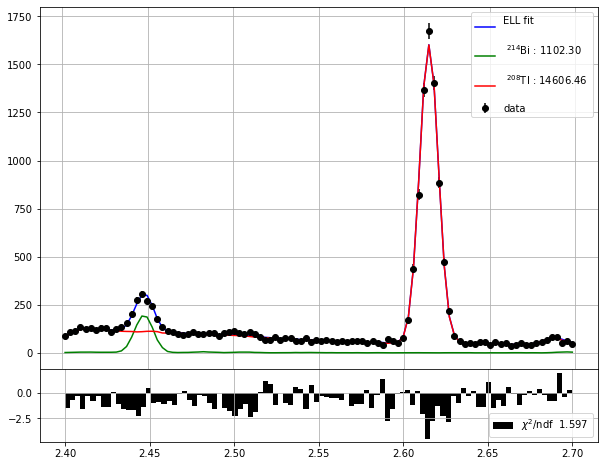

In [23]:
# get the blind mc samples
mcs_blind  = [mc[fn.selection_blind(mc)] for mc in mc_samples]

varname   = 'E'
refnames  = (varname,) 
refranges = (sel_erange,)

fit        = fn.prepare_fit_ell(mcs_blind, n_blind, refnames, refranges)

result, enes, ell, _ = fit(data_blind)
n_est = result.x

print('Initial   number of events :', *['{:6.2f}, '.format(ni) for ni in n_blind])
print('Estimated number of events :', *['{:6.2f}, '.format(ni) for ni in n_est])
# it also plots the histogram, the fit function, and the pdfs samples
pltfn.plot_fit_ell(enes, n_est, ell, parnames = sample_names_latex)

### Profile Likelihood Scan

We compute the uncertainties usign the log Likelihood scan

The uncertainties on $\mu$, in the gaussian domain, when there are two parameters $\mu, \nu$, are defined as the $\mu$ values where:

$$
t_\mu(x) \equiv \Delta - 2 \mathrm{log} \mathcal{L} = 
-2 \, \mathrm{log} \frac{\mathcal{L}(x | \mu, \hat{\nu}(\mu))}{\mathcal{L}(x | \hat{\mu}, \hat{\nu})}  = 1
$$


In the plot, the cover intervals at 68% CL of a parameter corresponds to the segment defined by the points where the  $\Delta -2 \log \mathcal{L} = 1$ line crosses the likelihood parabola.

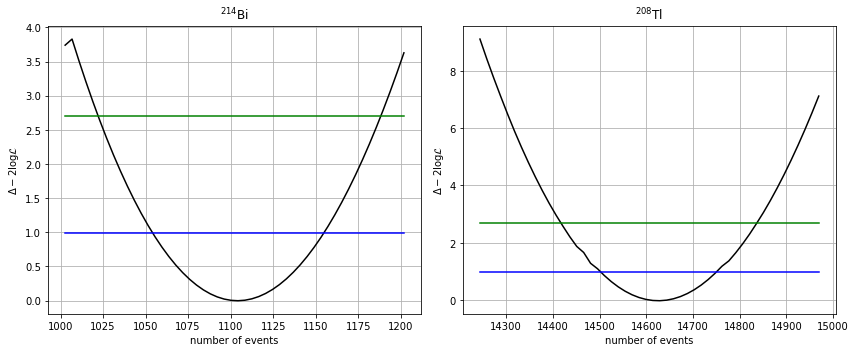

In [24]:
nis, tmus = fn.tmu_scan(enes, n_est, ell, sizes = (3., 3.))
pltfn.plot_tmu_scan(nis, tmus, titles = sample_names_latex)

In [25]:
cl    = 0.68
mucis = [efit.tmu_conf_int(ni, tmu, cl) for ni, tmu in zip(nis, tmus)]
for i, ci in enumerate(mucis):
    print('Number of {:s} events CI at {:4.0f} % CL = ({:5.2f}, {:5.2f})'.format(sample_names[i], 100*cl, *ci))

Number of Bi events CI at   68 % CL = (1055.55, 1153.12)
Number of Tl events CI at   68 % CL = (14510.27, 14747.05)


In [26]:
for i, ci in enumerate(mucis):
    print('Number of {:s} events CI at {:4.0f} % CL = {:5.2f}  {:5.2f} +{:5.2f}'.format(sample_names[i], 100*cl, 
                                                                                        result.x[i],
                                                                                        *(ci - result.x[i])))

Number of Bi events CI at   68 % CL = 1102.30  -46.75 +50.82
Number of Tl events CI at   68 % CL = 14606.46  -96.19 +140.59


### Computing the uncertainties in the number of Bkg

 Now the uncertainties in the number of background events in the RoI are:

 $$
\sigma_{n^k_{RoI}} = \frac{\epsilon^k_{RoI}}{\epsilon^k_b}\sigma_{n^k_{b}}, \;\; k = \mathrm{Bi}, \mathrm{Tl}
 $$


In [27]:
un_blind   = np.array([np.max(ci) - np.mean(ci) for ci in mucis])
effs_blind = np.array((collpars.eff_Bi_blind, collpars.eff_Tl_blind))
un_total   = un_blind/effs_blind

for i, u in enumerate(un_blind):
    print('Uncertainty in number of blind {:s} events  = {:6.3f} '.format(sample_names[i], u))
for i, u in enumerate(un_total):
    print('Uncertainty in number of total {:s} events  = {:6.3f} '.format(sample_names[i], u))

Uncertainty in number of blind Bi events  = 48.785 
Uncertainty in number of blind Tl events  = 118.391 
Uncertainty in number of total Bi events  = 62.146 
Uncertainty in number of total Tl events  = 167.455 


In [28]:
effs_E     = np.array((collpars.eff_Bi_E  , collpars.eff_Tl_E))
effs_RoI   = np.array((collpars.eff_Bi_RoI, collpars.eff_Tl_RoI))

un_E   = un_total * effs_E
un_RoI = un_total * effs_RoI

for i, u in enumerate(un_E):
    print('Uncertainty in number of {:s} events in erange = {:6.3f} '.format(sample_names[i], u))
for i, u in enumerate(un_RoI):
    print('Uncertainty in number of {:s} events in RoI    = {:6.3f} '.format(sample_names[i], u))

Uncertainty in number of Bi events in erange =  1.119 
Uncertainty in number of Tl events in erange =  1.222 
Uncertainty in number of Bi events in RoI    =  0.963 
Uncertainty in number of Tl events in RoI    =  0.032 


## Write Out

In [29]:
write = True

if (write):
    of = open('collpars.py', 'a')
    for i, sample in enumerate(sample_names):
        of.write('un_'+sample+'           = {:6.3f}'.format(un_total[i])+'\n')
        of.write('un_'+sample+'_blind     = {:6.3f}'.format(un_blind[i])+'\n')
        of.write('un_'+sample+'_E         = {:6.3f}'.format(un_E[i])  +'\n')
        of.write('un_'+sample+'_RoI       = {:6.3f}'.format(un_RoI[i])  +'\n')
    of.close()